<a href="https://colab.research.google.com/github/RylieWeaver/NLP/blob/main/NLP_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Lab 1 (Web Scraping and Analysis)

Link:

*   https://colab.research.google.com/drive/1eTQkX0kS2BqtTGGTKnI7tqFc__aFiMmM?usp=sharing




Notes:
- Proxy not needed

## 1 Setup

In [1]:
# Mount drive for directory structure
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Travel to crawler directory if needed when restarting runtime
%cd "/content/drive/MyDrive/NLP/Lab1/yelp_crawler"

/content/drive/MyDrive/NLP/Lab1/yelp_crawler


In [4]:
# Load your CSV data if needed when restarting runtime
import csv
with open('reviews.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    reviews = list(reader)

## 2 Scrape Text w/ Scrapy

### 2.0 Scrapy Setup

In [2]:
# Install Scrapy, a web scraping and crawling framework for Python.
# Pip install is done through terminal command
!pip install scrapy

# Import the scrapy module after installation. Gives tools to extract, process, and store web data.
import scrapy

# Import the crawler component from Scrapy. This is used to create spiders,
# which are classes that define how a site (or a group of sites) will be scraped.
from scrapy import crawler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.4/286.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 6.7 MB/s eta 0:00:00


In [3]:
# Travel to crawler directory to be able to run commands
%cd "/content/drive/MyDrive/NLP/Lab1/yelp_crawler"

/content/drive/MyDrive/NLP/Lab1/yelp_crawler


### 2.1 Create Project

In [ ]:
# Scrapy initialization provides architecture to design crawler
!scrapy startproject yelp_crawler

Error: scrapy.cfg already exists in /content/drive/MyDrive/NLP/Lab1/yelp_crawler


### 2.2 Create Spider

In [ ]:
# Change into directory where spider will be made
%cd yelp_crawler/yelp_crawler

[Errno 2] No such file or directory: 'yelp_crawler/yelp_crawler'
/content/drive/MyDrive/NLP/Lab1/yelp_crawler


In [ ]:
# Creat default spider
!scrapy genspider yelpbolt https://www.yelp.com/biz/upland-rheumatology-center-upland-2?osq=doctors#reviews

Created spider 'yelpbolt' using template 'basic' in module:
  yelp_crawler.spiders.yelpbolt


### 2.3 Edit Spider

Changed how crawler works to search all pagified reviews

Edited the User Agent and Robots.txt obey rule

Files attached as clean pdfs

### 2.4 Run the Crawler

In [ ]:
# Command to run the crawler
!scrapy crawl yelpbolt -o reviews.csv

2024-02-08 06:41:05 [scrapy.utils.log] INFO: Scrapy 2.11.0 started (bot: yelp_crawler)
2024-02-08 06:41:05 [scrapy.utils.log] INFO: Versions: lxml 4.9.4.0, libxml2 2.10.3, cssselect 1.2.0, parsel 1.8.1, w3lib 2.1.2, Twisted 22.10.0, Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0], pyOpenSSL 24.0.0 (OpenSSL 3.2.1 30 Jan 2024), cryptography 42.0.2, Platform Linux-6.1.58+-x86_64-with-glibc2.35
2024-02-08 06:41:05 [scrapy.addons] INFO: Enabled addons:
[]
2024-02-08 06:41:05 [asyncio] DEBUG: Using selector: EpollSelector
2024-02-08 06:41:05 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2024-02-08 06:41:05 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
2024-02-08 06:41:05 [scrapy.extensions.telnet] INFO: Telnet Password: 1a5d9f71ef1f0e47
2024-02-08 06:41:05 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',

Scrapy is made to give the number of reviews scraped in a feedexport "INFO", but this can also be checked with "cat reviews.csv | wc -l". Note the extra row because of column naming in csv files.

52 rows of reviews for 48 reviewers

In [ ]:
!(cat reviews.csv | wc -l)

53


## 3 Read csv File

In [4]:
%ls

reviews.csv  scrapy.cfg  yelp_crawler/


In [6]:
# Import to use csv
import csv

In [37]:
# Load your CSV data into 'reviews'
with open('reviews.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    reviews = list(reader)

In [ ]:
reviews[0]

['reviewer', 'rating', 'date', 'content']

In [ ]:
reviews[1]

['ANGIE D.',
 '5 star rating',
 'Jun 23, 2011',
 "My husband is a patient of Dr. K and I have accompanied him on a couple of office visits. He was the only doctor who was able to quickly diagnose my husband's condition after countless visits to our PCP, other urgent care, and the ER. After beginning treatment the doctor called our home to check how my husband was doing. In addition to being a great doctor, he also has a wonderful staff. The staff is not only professional, but also very friendly, and helpful. Everyone at this office truly cares about the patients."]

In [ ]:
reviews[1][3]

"My husband is a patient of Dr. K and I have accompanied him on a couple of office visits. He was the only doctor who was able to quickly diagnose my husband's condition after countless visits to our PCP, other urgent care, and the ER. After beginning treatment the doctor called our home to check how my husband was doing. In addition to being a great doctor, he also has a wonderful staff. The staff is not only professional, but also very friendly, and helpful. Everyone at this office truly cares about the patients."

In [3]:
# Travel to crawler directory to be able to run commands
%cd "/content/drive/MyDrive/NLP/Lab1/yelp_crawler"

/content/drive/MyDrive/NLP/Lab1/yelp_crawler


## 4 Contraction Expansion

We are told to do this before tokenization

### 4.1 Setup

In [69]:
# Read reviews if needed
with open('reviews.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    reviews = list(reader)

In [7]:
# Get contractions library
!pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.3 MB/s eta 0:00:00


### 4.2 Testing

In [30]:
# Read one review to test contraction expansion on
row = reviews[2]   # Review with a contraction is chosen
review_text = row[3]
review_text_words = review_text.split()
print(review_text_words)

['I', 'saw', 'Dr.', 'Kokhab', 'twice', 'at', 'the', 'urgent', 'care', 'in', 'Upland.', "I've", 'had', 'Fibromyalgia', 'for', '23', 'years', 'now', 'and', 'I', 'had', 'just', 'quit', 'Norco', '10-325', 'cold', 'turkey', 'after', 'taking', '5-6', 'pills', 'a', 'day', 'for', '5', 'years.', 'Dr', 'Kokhab', 'helped', 'me', 'by', 'giving', 'me', 'a', 'non', 'addictive', 'medication', 'similar', 'to', 'Tylenol', 'and', 'told', 'me', 'to', 'make', 'an', 'appt', 'at', 'his', 'office', 'location', 'to', 'treat', 'my', 'Fibro.', 'He', 'seems', 'like', 'a', 'very', 'good', 'Dr.', 'and', 'took', 'his', 'time', 'twice', 'to', 'answer', 'my', 'questions', 'and', 'help', 'me', 'in', 'any', 'way', 'he', 'can.', 'I', 'will', 'update', 'you', 'with', 'more', 'info', 'after', 'I', 'see', 'him', 'tomorrow', 'at', 'his', 'office.']


In [31]:
# Instantiate empty word list
expanded_words = []

# Expand words and append
for word in review_text_words:
  expanded_words.append(contractions.fix(word))

# Make clean string
expanded_review_text = ' '.join(expanded_words)
print('Original: ', review_text)
print('Expanded: ', expanded_review_text)

Original:  I saw Dr. Kokhab twice at the urgent care in Upland. I've had Fibromyalgia for 23 years now and I had just quit Norco 10-325 cold turkey after taking 5-6 pills a day for 5 years. Dr Kokhab helped me by giving me a non addictive medication similar to Tylenol and told me to make an appt at his office location to treat my Fibro. He seems like a very good Dr. and took his time twice to answer my questions and help me in any way he can. I will update you with more info after I see him tomorrow at his office.
Expanded:  I saw Dr. Kokhab twice at the urgent care in Upland. I have had Fibromyalgia for 23 years now and I had just quit Norco 10-325 cold turkey after taking 5-6 pills a day for 5 years. Dr Kokhab helped me by giving me a non addictive medication similar to Tylenol and told me to make an appt at his office location to treat my Fibro. He seems like a very good Dr. and took his time twice to answer my questions and help me in any way he can. I will update you with more inf

### 4.3 Contraction Expansion

In [38]:
"""Do Contraction Expansion for All Reviews"""

# Process each row, assuming the first row is headers
for i, row in enumerate(reviews):
    if i == 0:  # Add header row labels
      row.extend(["Contraction Expanded"])
      continue

    # If not header row, continue to do tokenization and appending
    review_text = row[3]  # Assuming the fourth column contains the review text
    review_text_words = review_text.split()

    # Expand words and append
    expanded_words = []
    for word in review_text_words:
      expanded_words.append(contractions.fix(word))

    # Make clean string
    expanded_review_text = ' '.join(expanded_words)

    # Append the expanded text as new elements in the row
    row.extend([expanded_review_text])

In [39]:
# Observe one row before and after expansion
row = reviews[2]
review_text = row[3]
expanded_review_text_words = row[4]
review_text_words = review_text.split()
print(review_text_words)
print('Original: ', review_text)
print('Expanded: ', expanded_review_text_words)

['I', 'saw', 'Dr.', 'Kokhab', 'twice', 'at', 'the', 'urgent', 'care', 'in', 'Upland.', "I've", 'had', 'Fibromyalgia', 'for', '23', 'years', 'now', 'and', 'I', 'had', 'just', 'quit', 'Norco', '10-325', 'cold', 'turkey', 'after', 'taking', '5-6', 'pills', 'a', 'day', 'for', '5', 'years.', 'Dr', 'Kokhab', 'helped', 'me', 'by', 'giving', 'me', 'a', 'non', 'addictive', 'medication', 'similar', 'to', 'Tylenol', 'and', 'told', 'me', 'to', 'make', 'an', 'appt', 'at', 'his', 'office', 'location', 'to', 'treat', 'my', 'Fibro.', 'He', 'seems', 'like', 'a', 'very', 'good', 'Dr.', 'and', 'took', 'his', 'time', 'twice', 'to', 'answer', 'my', 'questions', 'and', 'help', 'me', 'in', 'any', 'way', 'he', 'can.', 'I', 'will', 'update', 'you', 'with', 'more', 'info', 'after', 'I', 'see', 'him', 'tomorrow', 'at', 'his', 'office.']
Original:  I saw Dr. Kokhab twice at the urgent care in Upland. I've had Fibromyalgia for 23 years now and I had just quit Norco 10-325 cold turkey after taking 5-6 pills a day f

## 5 Tokenization

### 5.1 Setup

In [10]:
# Do necessary preparation... importing what's needed and creating an instance
# of the Treebank tokenizer class

# Imports
import nltk
from nltk.tokenize import(sent_tokenize,
                          word_tokenize,
                          TreebankWordTokenizer,
                          wordpunct_tokenize)

# Make sure punkt is downloaded
nltk.download('punkt')

# Instantiate treebank tokenizer
treebank = TreebankWordTokenizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### 5.2 Testing

In [76]:
# Make copy to test with
import copy

# Deep copy example
reviews_copy = copy.deepcopy(reviews)

In [79]:
"""Test out the tokenization on just one row using all tokenizers"""

# Instantiate columns to later be appended to data
sent_tokenized_rows = []
word_tokenized_rows = []
treebank_tokenized_rows = []
wordpunct_tokenized_rows = []

# For loop for just one row
for i in [2]:   # Make sure to skip the header row
  # Look at whole row
  row = reviews_copy[i]
  print(row)

  # Look at review in particular
  review_text = row[3]
  print(review_text)

  # Tokenize
  sent_tokens = sent_tokenize(review_text)
  word_tokens = word_tokenize(review_text)
  treebank_tokens = treebank.tokenize(review_text)
  wordpunct_tokens = wordpunct_tokenize(review_text)

  # Look at tokenized
  print(sent_tokens)
  print(word_tokens)
  print(treebank_tokens)
  print(wordpunct_tokens)

  # Append the tokenized data to the respective lists
  sent_tokenized_rows.append(sent_tokens)
  word_tokenized_rows.append(word_tokens)
  treebank_tokenized_rows.append(treebank_tokens)
  wordpunct_tokenized_rows.append(wordpunct_tokens)

  # Extend row to include the various tokenizations
  row.extend([sent_tokens, word_tokens, treebank_tokens, wordpunct_tokens])

  # Check components of row
  for i in range(len(row)):
    print(row[i])

['Sara C.', '5 star rating', 'Apr 27, 2011', "I saw Dr. Kokhab twice at the urgent care in Upland. I've had Fibromyalgia for 23 years now and I had just quit Norco 10-325 cold turkey after taking 5-6 pills a day for 5 years. Dr Kokhab helped me by giving me a non addictive medication similar to Tylenol and told me to make an appt at his office location to treat my Fibro. He seems like a very good Dr. and took his time twice to answer my questions and help me in any way he can. I will update you with more info after I see him tomorrow at his office.", 'I saw Dr. Kokhab twice at the urgent care in Upland. I have had Fibromyalgia for 23 years now and I had just quit Norco 10-325 cold turkey after taking 5-6 pills a day for 5 years. Dr Kokhab helped me by giving me a non addictive medication similar to Tylenol and told me to make an appt at his office location to treat my Fibro. He seems like a very good Dr. and took his time twice to answer my questions and help me in any way he can. I wi

### 5.3 Tokenization

In [40]:
"""Use one tokenization on all reviews. I choose the word_tokenizer"""

# Imports
import nltk
from nltk.tokenize import(word_tokenize)
# Make sure punkt is downloaded
nltk.download('punkt')

# Instantiate columns to later be appended to data
word_tokenized_rows = []

# Process each row, assuming the first row is headers
for i, row in enumerate(reviews):
    if i == 0:  # Add header row labels
      row.extend(["Tokenized"])
      continue

    # If not header row, continue to do tokenization and appending
    review_text = row[4]

    # Tokenize the review text
    word_tokens = word_tokenize(review_text)

    # Append the tokenized text as new elements in the row
    row.append(word_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
# Check rows
rows = [reviews[0], reviews[2]]
for row in rows:
  for i in range(len(row)):
    print(row[i])
  print("-------------------------------")

reviewer
rating
date
content
Contraction Expanded
Tokenized
-------------------------------
Sara C.
5 star rating
Apr 27, 2011
I saw Dr. Kokhab twice at the urgent care in Upland. I've had Fibromyalgia for 23 years now and I had just quit Norco 10-325 cold turkey after taking 5-6 pills a day for 5 years. Dr Kokhab helped me by giving me a non addictive medication similar to Tylenol and told me to make an appt at his office location to treat my Fibro. He seems like a very good Dr. and took his time twice to answer my questions and help me in any way he can. I will update you with more info after I see him tomorrow at his office.
I saw Dr. Kokhab twice at the urgent care in Upland. I have had Fibromyalgia for 23 years now and I had just quit Norco 10-325 cold turkey after taking 5-6 pills a day for 5 years. Dr Kokhab helped me by giving me a non addictive medication similar to Tylenol and told me to make an appt at his office location to treat my Fibro. He seems like a very good Dr. and 

## 6 Spellcheck

### 6.1 Setup

In [13]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 48.2 MB/s eta 0:00:00


In [14]:
# Import and instantiate spellchecker class
from spellchecker import SpellChecker
spellchecker = SpellChecker()

### 6.2 Testing

In [93]:
# Take a single tokenized review
review = reviews[2]
tokenized_review_text = review[5]
print(tokenized_review_text)

['I', 'saw', 'Dr.', 'Kokhab', 'twice', 'at', 'the', 'urgent', 'care', 'in', 'Upland', '.', 'I', 'have', 'had', 'Fibromyalgia', 'for', '23', 'years', 'now', 'and', 'I', 'had', 'just', 'quit', 'Norco', '10-325', 'cold', 'turkey', 'after', 'taking', '5-6', 'pills', 'a', 'day', 'for', '5', 'years', '.', 'Dr', 'Kokhab', 'helped', 'me', 'by', 'giving', 'me', 'a', 'non', 'addictive', 'medication', 'similar', 'to', 'Tylenol', 'and', 'told', 'me', 'to', 'make', 'an', 'appt', 'at', 'his', 'office', 'location', 'to', 'treat', 'my', 'Fibro', '.', 'He', 'seems', 'like', 'a', 'very', 'good', 'Dr.', 'and', 'took', 'his', 'time', 'twice', 'to', 'answer', 'my', 'questions', 'and', 'help', 'me', 'in', 'any', 'way', 'he', 'can', '.', 'I', 'will', 'update', 'you', 'with', 'more', 'info', 'after', 'I', 'see', 'him', 'tomorrow', 'at', 'his', 'office', '.']


In [94]:
# Observe the unrecognized words (expected to be misspelled)
misspelled = spellchecker.unknown(tokenized_review_text)
print(misspelled)

{'kokhab', 'norco', 'dr.', 'dr', 'fibromyalgia', '5-6', 'appt', '10-325', 'fibro', 'tylenol'}


### 6.3 Misspelled Word Collection

**All Misspellings**

In [20]:
misspelled_all = set()  # Using a set to automatically ensure uniqueness

# Iterate over the rows, adding the expected misspelled words
for i, row in enumerate(reviews):
  if i == 0:
    continue  # Skip the header row
  tokenized_review_text = row[5]  # tokenized row is the 6'th column
  review_misspelled = spellchecker.unknown(tokenized_review_text)
  misspelled_all.update(review_misspelled)  # Use 'update' to add items from the set

In [22]:
print(misspelled_all)

{'patients.this', 'me.instead', 'comp', 'ra', 'nice.took', 'schumann', 'doctor.highly', 'ck', 'najafabadi', '...', 'labwork', 'cece', '4:20', '....', 'pcp', 'stacey', 'knowledgable', 'usc', 'workmans', 'by.i', 'md', 'fibromyalgia', 'norco', 'stevens', '5-6', 'would=', 'fibro', '10-325', 're-allocated', 'not-care', 'rheumatologist', 'dr', 'khaleghi', 'in-office', '--', 'jparedes', 'dr.', 'lol', 'gi', 'tylenol', 'nothing.this', 'listen-', 'appt', '3rd', 'scholman', '..', '50/50', 'specalist', 'pulmonologist', 'schulman', 'arthritis.after', 'hope.thankyou', 'chrons', 'herself.mistreated', 'psoriatic', 'steps.i', 'ucla', 'mary.the', 'voicemail', '``', 'knowledge.for', 'provider.she', 'rheumatological', 'kokhab', 'omg', 'out.stay', 'no-shows', 'gp', 'prednisone', 'televisits', 'co-pays', "''", 'etc', '.dr', 'rheumatology', '.....', 'ebrahim', 'sus', 'kohkab-', 'ent', 'tiffany', 'chicago', 'meds', '4pm', 'cynthia', 'gloria', 'voicemails', 'nothing.i', 'zuniga', 'voicemails.i', 'react.i', 'ja

In [24]:
# Writing misspelled words to a .txt file
with open('misspelled_all.txt', 'w') as file:
    for word in misspelled_all:
        file.write(f"{word}\n")

**Misspellings By Review**

In [25]:
# Dictionary to hold misspelled words for each review
misspelled_by_review = {}

# Iterate over rows
for i, row in enumerate(reviews):
  if i == 0:
    continue  # Skip the header row

  # Find misspelled words
  tokenized_review_text = row[5]
  misspelled = spellchecker.unknown(tokenized_review_text)

  # Store the misspelled words in the dictionary
  misspelled_by_review[f"Review {i}"] = list(misspelled)

# Write the collected misspelled words to a file
with open('misspelled_by_review.txt', 'w') as file:
    for review, words in misspelled_by_review.items():
        file.write(f"{review}:")
        # Join the words with a comma and a space, and write them
        file.write(", ".join(words))
        file.write("\n")  # New line after each review

In [26]:
print(misspelled_by_review["Review 1"])

['dr.', 'pcp', "'s"]


## 7. Text Normalization



*   Lowercase all words
*   Remove stopwords
*   Remove digits
*   Remove punctuations
*   Remove tokens less than two characters



Not said that we need to lemmatize

### 7.1 Setup

In [20]:
# Imports
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
# Make function to normalize tokens
def preprocessing(tokens):
  tokens = [token.lower() for token in tokens]  # lowercasing

  stop_words = set(stopwords.words("english"))  # use english stopwords
  tokens = [token for token in tokens if token not in stop_words]  # remove stopwords

  tokens = [token for token in tokens if not token.isdigit()] # remove digits

  tokens = [token for token in tokens if token not in punctuation]  # remove punctuation

  tokens = [token for token in tokens if len(token)>2]  # remove tokens with two or less characters

  return tokens

### 7.2 Testing

In [33]:
row = reviews[2]
print(len(row))
tokenized_review_text = row[5]
print(tokenized_review_text)
preprocessed_review_text = preprocessing(tokenized_review_text)
print(preprocessed_review_text)

6
['I', 'saw', 'Dr.', 'Kokhab', 'twice', 'at', 'the', 'urgent', 'care', 'in', 'Upland', '.', 'I', 'have', 'had', 'Fibromyalgia', 'for', '23', 'years', 'now', 'and', 'I', 'had', 'just', 'quit', 'Norco', '10-325', 'cold', 'turkey', 'after', 'taking', '5-6', 'pills', 'a', 'day', 'for', '5', 'years', '.', 'Dr', 'Kokhab', 'helped', 'me', 'by', 'giving', 'me', 'a', 'non', 'addictive', 'medication', 'similar', 'to', 'Tylenol', 'and', 'told', 'me', 'to', 'make', 'an', 'appt', 'at', 'his', 'office', 'location', 'to', 'treat', 'my', 'Fibro', '.', 'He', 'seems', 'like', 'a', 'very', 'good', 'Dr.', 'and', 'took', 'his', 'time', 'twice', 'to', 'answer', 'my', 'questions', 'and', 'help', 'me', 'in', 'any', 'way', 'he', 'can', '.', 'I', 'will', 'update', 'you', 'with', 'more', 'info', 'after', 'I', 'see', 'him', 'tomorrow', 'at', 'his', 'office', '.']
['saw', 'dr.', 'kokhab', 'twice', 'urgent', 'care', 'upland', 'fibromyalgia', 'years', 'quit', 'norco', '10-325', 'cold', 'turkey', 'taking', '5-6', 'p

### 7.3 Normalization

In [42]:
"""Do preprocessing for all reviews"""

# Iterate over the rows, adding the normalized token as a column
for i, row in enumerate(reviews):
  if i == 0:
    row.extend(["Preprocessed"])
    continue  # Skip the header row
  tokenized_review_text = row[5]  # tokenized row is the 6'th column
  # Preprocess tokens
  preprocessed_review_text = preprocessing(tokenized_review_text)
  # Append the preprocessed text as new elements in the row
  row.append(preprocessed_review_text)

In [43]:
# Check rows
rows = [reviews[0], reviews[2]]
for row in rows:
  for i in range(len(row)):
    print(row[i])
  print("-------------------------------")

reviewer
rating
date
content
Contraction Expanded
Tokenized
Preprocessed
-------------------------------
Sara C.
5 star rating
Apr 27, 2011
I saw Dr. Kokhab twice at the urgent care in Upland. I've had Fibromyalgia for 23 years now and I had just quit Norco 10-325 cold turkey after taking 5-6 pills a day for 5 years. Dr Kokhab helped me by giving me a non addictive medication similar to Tylenol and told me to make an appt at his office location to treat my Fibro. He seems like a very good Dr. and took his time twice to answer my questions and help me in any way he can. I will update you with more info after I see him tomorrow at his office.
I saw Dr. Kokhab twice at the urgent care in Upland. I have had Fibromyalgia for 23 years now and I had just quit Norco 10-325 cold turkey after taking 5-6 pills a day for 5 years. Dr Kokhab helped me by giving me a non addictive medication similar to Tylenol and told me to make an appt at his office location to treat my Fibro. He seems like a very 

## 8 Store/Load Fully Processed Reviews

In [ ]:
# Mount drive for directory structure
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

### Store

Store/Load so that the processing does not need to be repeated every time the runtime restarts

In [36]:
print(type(reviews))

<class 'list'>


In [48]:
# Travel to crawler directory if needed when restarting runtime
%cd "/content/drive/MyDrive/NLP/Lab1/yelp_crawler"

/content/drive/MyDrive/NLP/Lab1/yelp_crawler


In [51]:
# Check correct directory to store
%ls

misspelled_all.txt        reviews.csv            scrapy.cfg
misspelled_by_review.txt  reviews_processed.csv  yelp_crawler/


In [46]:
# Setup
import csv
filename = 'reviews_processed.csv'

# Open the file in write mode ('w') and create a csv.writer object
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)

    # Write all rows at once
    writer.writerows(reviews)

# Print success
print(f'Reviews successfully written to {filename}')

Reviews successfully written to reviews_processed.csv


In [47]:
# Check that the processed reviews saved
%ls

misspelled_all.txt        reviews.csv            scrapy.cfg
misspelled_by_review.txt  reviews_processed.csv  yelp_crawler/


### Load

In [ ]:
# Travel to crawler directory if needed when restarting runtime
%cd "/content/drive/MyDrive/NLP/Lab1/yelp_crawler"

In [153]:
# Load your CSV data if needed when restarting runtime
import csv
with open('reviews_processed.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    reviews_processed = list(reader)

In [154]:
# Check load
rows = [reviews_processed[0], reviews_processed[2]]
for row in rows:
  for i in range(len(row)):
    print(row[i])
  print("-------------------------------")

reviewer
rating
date
content
Contraction Expanded
Tokenized
Preprocessed
-------------------------------
Sara C.
5 star rating
Apr 27, 2011
I saw Dr. Kokhab twice at the urgent care in Upland. I've had Fibromyalgia for 23 years now and I had just quit Norco 10-325 cold turkey after taking 5-6 pills a day for 5 years. Dr Kokhab helped me by giving me a non addictive medication similar to Tylenol and told me to make an appt at his office location to treat my Fibro. He seems like a very good Dr. and took his time twice to answer my questions and help me in any way he can. I will update you with more info after I see him tomorrow at his office.
I saw Dr. Kokhab twice at the urgent care in Upland. I have had Fibromyalgia for 23 years now and I had just quit Norco 10-325 cold turkey after taking 5-6 pills a day for 5 years. Dr Kokhab helped me by giving me a non addictive medication similar to Tylenol and told me to make an appt at his office location to treat my Fibro. He seems like a very 

In [72]:
print(len(reviews[0]))

7


## 9 Word Context

### 9.1 Word Concordance

In [74]:
# Imports
import ast

# Get one review
row = reviews_processed[1]
review = row[6]
review = ast.literal_eval(review)  # make sure review is a list type

# Check review
print(type(review))
print(review)

# Make into Text
processed_text = Text(review)
print(processed_text)

<class 'list'>
['husband', 'patient', 'dr.', 'accompanied', 'couple', 'office', 'visits', 'doctor', 'able', 'quickly', 'diagnose', 'husband', 'condition', 'countless', 'visits', 'pcp', 'urgent', 'care', 'beginning', 'treatment', 'doctor', 'called', 'home', 'check', 'husband', 'addition', 'great', 'doctor', 'also', 'wonderful', 'staff', 'staff', 'professional', 'also', 'friendly', 'helpful', 'everyone', 'office', 'truly', 'cares', 'patients']
<Text: husband patient dr. accompanied couple office visits doctor...>


In [116]:
# Imports
import ast
import nltk
from nltk.text import Text
nltk.download('punkt')

# Instantiate collected tokens
all_processed_tokens = []

# Collect all tokens together
for i, row in enumerate(reviews_processed):
  if i == 0:  # skip header row
    continue
  # Read review
  review = row[6]  # processed review is in 7'th column
  review = ast.literal_eval(review)
  # Append to all tokens
  all_processed_tokens.extend(review)

# Check all tokens
print(all_processed_tokens[:20])

# Make text object
all_processed_text = Text(all_processed_tokens)

# Check text
print(all_processed_text[:20])

['husband', 'patient', 'dr.', 'accompanied', 'couple', 'office', 'visits', 'doctor', 'able', 'quickly', 'diagnose', 'husband', 'condition', 'countless', 'visits', 'pcp', 'urgent', 'care', 'beginning', 'treatment']
['husband', 'patient', 'dr.', 'accompanied', 'couple', 'office', 'visits', 'doctor', 'able', 'quickly', 'diagnose', 'husband', 'condition', 'countless', 'visits', 'pcp', 'urgent', 'care', 'beginning', 'treatment']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [99]:
# Use concordance on this Text object
word_to_search = "office"
all_processed_text.concordance(word_to_search)

Displaying 25 of 42 matches:
band patient dr. accompanied couple office visits doctor able quickly diagnose
onal also friendly helpful everyone office truly cares patients saw dr. kokhab
tion similar tylenol told make appt office location treat fibro seems like goo
s help way update info see tomorrow office dr. kokhab awesome doctor rush appo
 great since could seen regular dr. office good thing especially since trouble
el lucky group staff honestly worst office staff ever dealt business argumenta
care professional need make changes office manager staff want provide around g
 going many offices get busy forget office flair ups doctor waited make sure a
ul found dr. kokhab would recommend office everyone anyone needs type specalis
elp everyone deeper level food back office give patients treats like family th
really cares everything right leave office makes sure help pain never doctor g
mmend couple televisits dr. sadeghi office nice knowledgable doctor happy visi
hange offices account i

In [106]:
# Need sys to print without making a variable
import sys

# Define the word to search
word_to_search = "office"

# Open the file to write concordance results to
with open('concordance_output.txt', 'w') as file:
    # Temporarily redirect standard output to the file
    original_stdout = sys.stdout  # Save the original standard output
    sys.stdout = file  # Redirect standard output to the file

    # Use concordance on this Text object
    all_processed_text.concordance(word_to_search)

    sys.stdout = original_stdout  # Reset standard output to its original value

# Print success
print("Concordance output written to 'concordance_output.txt'")

Concordance output written to 'concordance_output.txt'


### 9.2 Most Common Words

In [103]:
import nltk
from nltk import Text
from nltk.tokenize import word_tokenize
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from collections import Counter

# Text object
text = all_processed_text

# Find all contexts of "office"
window_size = 5
office_contexts = []

# Tokenize and create a list of all words in a window around "office"
for i, word in enumerate(text.tokens):
    if word.lower() == "office":
        start = max(0, i - window_size)
        end = min(len(text.tokens), i + window_size + 1)
        context = text.tokens[start:end]
        office_contexts.extend(context)

# Remove "office" from the contexts to analyze the surrounding words
surrounding_words = [word.lower() for word in office_contexts if word.lower() != "office"]

# Count and display the most common words
most_common_words = Counter(surrounding_words).most_common()

print("Most common words appearing with 'office':")
for word, count in most_common_words:
  if count >= 3:  # Only print counts greater than or equal to 3
    print(f"{word}: {count}")

Most common words appearing with 'office':
dr.: 8
staff: 8
doctor: 7
make: 6
would: 6
news: 6
recommend: 5
come: 5
professional: 4
everyone: 4
patients: 4
like: 4
kokhab: 4
seen: 4
good: 4
manager: 4
get: 4
back: 4
cece: 4
husband: 3
told: 3
way: 3
see: 3
since: 3
could: 3
care: 3
many: 3
offices: 3
pain: 3
kind: 3
insurance: 3
great: 3
rheumatologist: 3
going: 3
first: 3


In [105]:
# Write the most common words (with counts >= 3) to the file
with open('office_most_common_words.txt', 'w') as file:
    file.write("Most common words appearing with 'office' (count >= 3):\n")
    for word, count in most_common_words:
        if count >= 3:  # Only include words with counts greater than or equal to 3
            file.write(f"{word}: {count}\n")

## 10 Text Statistics

### 10.1 Review Lengths

In [155]:
# Imports
import ast

# Look at header row
row = reviews_processed[0]
print(row)

# Look at original and cleaned
row = reviews_processed[1]
print(row[4])
# Cleaned will need to be converted from tokenized to cleaned
print(type(row[6]))
print(' '.join(ast.literal_eval(row[6])))

['reviewer', 'rating', 'date', 'content', 'Contraction Expanded', 'Tokenized', 'Preprocessed']
My husband is a patient of Dr. K and I have accompanied him on a couple of office visits. He was the only doctor who was able to quickly diagnose my husband's condition after countless visits to our PCP, other urgent care, and the ER. After beginning treatment the doctor called our home to check how my husband was doing. In addition to being a great doctor, he also has a wonderful staff. The staff is not only professional, but also very friendly, and helpful. Everyone at this office truly cares about the patients.
<class 'str'>
husband patient dr. accompanied couple office visits doctor able quickly diagnose husband condition countless visits pcp urgent care beginning treatment doctor called home check husband addition great doctor also wonderful staff staff professional also friendly helpful everyone office truly cares patients


First make column with clean processed strings

In [156]:
# Imports
import ast

# Loop through each row in reviews_processed
for i, row in enumerate(reviews_processed):
  if i == 0:
    row.append('Cleaned String')  # new header
    continue
  # Convert the string representation of the tokenized review into a list
  tokenized_review = ast.literal_eval(row[6])

  # Join the tokens into a single cleaned string
  cleaned_review = ' '.join(tokenized_review)

  # Append the cleaned review to the current row
  row.append(cleaned_review)

In [157]:
# Check row
row = reviews_processed[1]
print(row[3])
print(row[7])

My husband is a patient of Dr. K and I have accompanied him on a couple of office visits. He was the only doctor who was able to quickly diagnose my husband's condition after countless visits to our PCP, other urgent care, and the ER. After beginning treatment the doctor called our home to check how my husband was doing. In addition to being a great doctor, he also has a wonderful staff. The staff is not only professional, but also very friendly, and helpful. Everyone at this office truly cares about the patients.
husband patient dr. accompanied couple office visits doctor able quickly diagnose husband condition countless visits pcp urgent care beginning treatment doctor called home check husband addition great doctor also wonderful staff staff professional also friendly helpful everyone office truly cares patients


Count original and cleaned review lengths

In [158]:
# Loop through each row in reviews_processed
for i, row in enumerate(reviews_processed):
  if i == 0:
    row.extend(['Original String Length', 'Clean String Length'])  # new headers
    continue
  # Get original review length
  original_length = len(row[3])

  # Get original review length
  cleaned_length = len(row[7])

  # Extend with the lengths
  row.extend([original_length, cleaned_length])

In [159]:
# Check rows
row = reviews_processed[0]
print(row)
row = reviews_processed[1]
print(row[8], row[9])

['reviewer', 'rating', 'date', 'content', 'Contraction Expanded', 'Tokenized', 'Preprocessed', 'Cleaned String', 'Original String Length', 'Clean String Length']
519 306


### 10.2 Lexical Diversity

In [160]:
# Make function for lexical diversity (unique tokens/total tokens)
def lexical_diversity_calculator(text):
  return len(set(text))/len(text)

In [161]:
# Loop through each row in reviews_processed to append lexical diversity
for i, row in enumerate(reviews_processed):
  if i == 0:
    row.append('Lexical Diversity')  # new headers
    continue

  # Get original review length
  lexical_diversity = lexical_diversity_calculator(row[6])

  # Append with the lengths
  row.append(lexical_diversity)

In [163]:
# Check rows
row = reviews_processed[0]
print(row)
row = reviews_processed[1]
print(row[8], row[9], row[10])

['reviewer', 'rating', 'date', 'content', 'Contraction Expanded', 'Tokenized', 'Preprocessed', 'Cleaned String', 'Original String Length', 'Clean String Length', 'Lexical Diversity']
519 306 0.06744186046511629


### 10.3 Write Table

In [164]:
type(reviews_processed)

list

In [174]:
# Define which columns to include (8, 9, and 10 contain the lengths and lexical diversity)
selected_columns = [8, 9, 10]

# Create a table with the selected columns
table = []
for i, row in enumerate(reviews_processed):
  if i == 0:
    row.extend(['Review', 'Review Length', 'Cleaned Review Length', 'Lexical Diversity'])
    continue
  selected_row = [i]  # Add review number as the first item
  selected_row.extend([row[i] for i in selected_columns])  # Add selected columns
  table.append(selected_row)

In [175]:
print(table)

[[1, 519, 306, 0.06744186046511629], [2, 508, 314, 0.07741935483870968], [3, 280, 161, 0.12658227848101267], [4, 92, 58, 0.22093023255813954], [5, 488, 316, 0.0645879732739421], [6, 258, 183, 0.109375], [7, 623, 388, 0.050966608084358524], [8, 159, 90, 0.1889763779527559], [9, 553, 287, 0.06716417910447761], [10, 275, 190, 0.10526315789473684], [11, 465, 283, 0.07088607594936709], [12, 915, 516, 0.039318479685452164], [13, 678, 424, 0.0490506329113924], [14, 468, 295, 0.06971153846153846], [15, 302, 173, 0.10714285714285714], [16, 301, 173, 0.11372549019607843], [17, 451, 248, 0.0784313725490196], [18, 749, 508, 0.04261363636363636], [19, 126, 79, 0.23008849557522124], [20, 724, 499, 0.04016620498614958], [21, 109, 83, 0.2222222222222222], [22, 771, 452, 0.0445468509984639], [23, 361, 179, 0.09689922480620156], [24, 301, 188, 0.10256410256410256], [25, 1336, 762, 0.0279027902790279], [26, 378, 231, 0.08459214501510574], [27, 677, 440, 0.056910569105691054], [28, 305, 161, 0.11538461538

In [176]:
# Imports
import csv

# Write the table to a csv file
with open("table.csv", "w") as file:
    for row in table:
        # Join the selected columns with a comma for CSV format
        row_str = ",".join(str(item) for item in row)
        file.write(row_str + "\n")

## 11 Frequency Plot

In [ ]:
# Imports
import ast

# Instantiate collected tokens
all_processed_tokens = []

# Collect all tokens together
for i, row in enumerate(reviews_processed):
  if i == 0:  # skip header row
    continue
  # Read review
  review = row[6]  # processed review is in 7'th column
  review = ast.literal_eval(review)
  # Append to all tokens
  all_processed_tokens.extend(review)

# Check all tokens
print(all_processed_tokens[:20])

In [183]:
# Imports
from nltk import FreqDist

# Make frequency distribution
fdist_reviews = FreqDist(all_processed_tokens)
fdist_reviews

FreqDist({'office': 42, 'dr.': 41, 'doctor': 27, 'get': 26, 'kokhab': 25, 'would': 24, 'time': 23, 'staff': 19, 'seen': 17, 'appointment': 17, ...})

In [184]:
# Total number of tokens
print(f"Total Num Tokens: {fdist_reviews.N()}")

# Frequency of office
word = 'office'
print(f"Frequency of {word}: {fdist_reviews.freq(word)}")

Total Num Tokens: 2404
Frequency of office: 0.01747088186356073


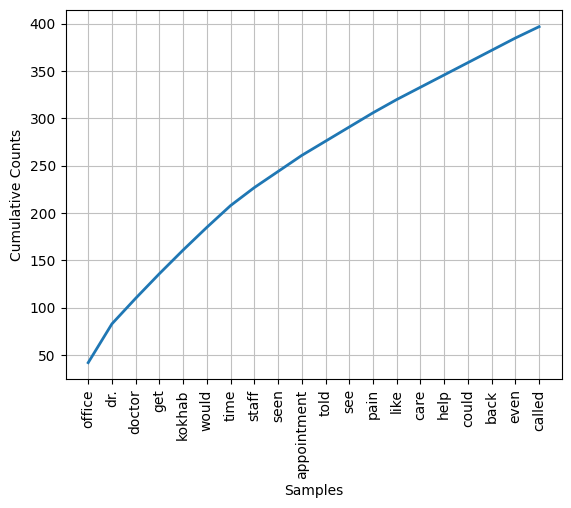

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [186]:
# Plot the frequency of top 25
fdist_reviews.plot(20, cumulative=True)